In [13]:
# Step 1: Importing necessary libraries
import pandas as pd                  # for data manipulation
import numpy as np                   # for numerical operations
import matplotlib.pyplot as plt      # for data visualization
import seaborn as sns                # for advanced visualizations

In [73]:
# Step 2: Loading the dataset
data = pd.read_csv("USA_Housing.csv")

In [17]:
# Step 3: Displaying the first few rows of the data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

In [19]:
# Step 4: Checking the structure of the dataset
print("\nInformation about dataset:")
print(data.info())


Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [21]:
# Step 5: Statistical description of the dataset
print("\nStatistical description of the dataset:")
print(data.describe())


Statistical description of the dataset:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min    


Generating pairplot...


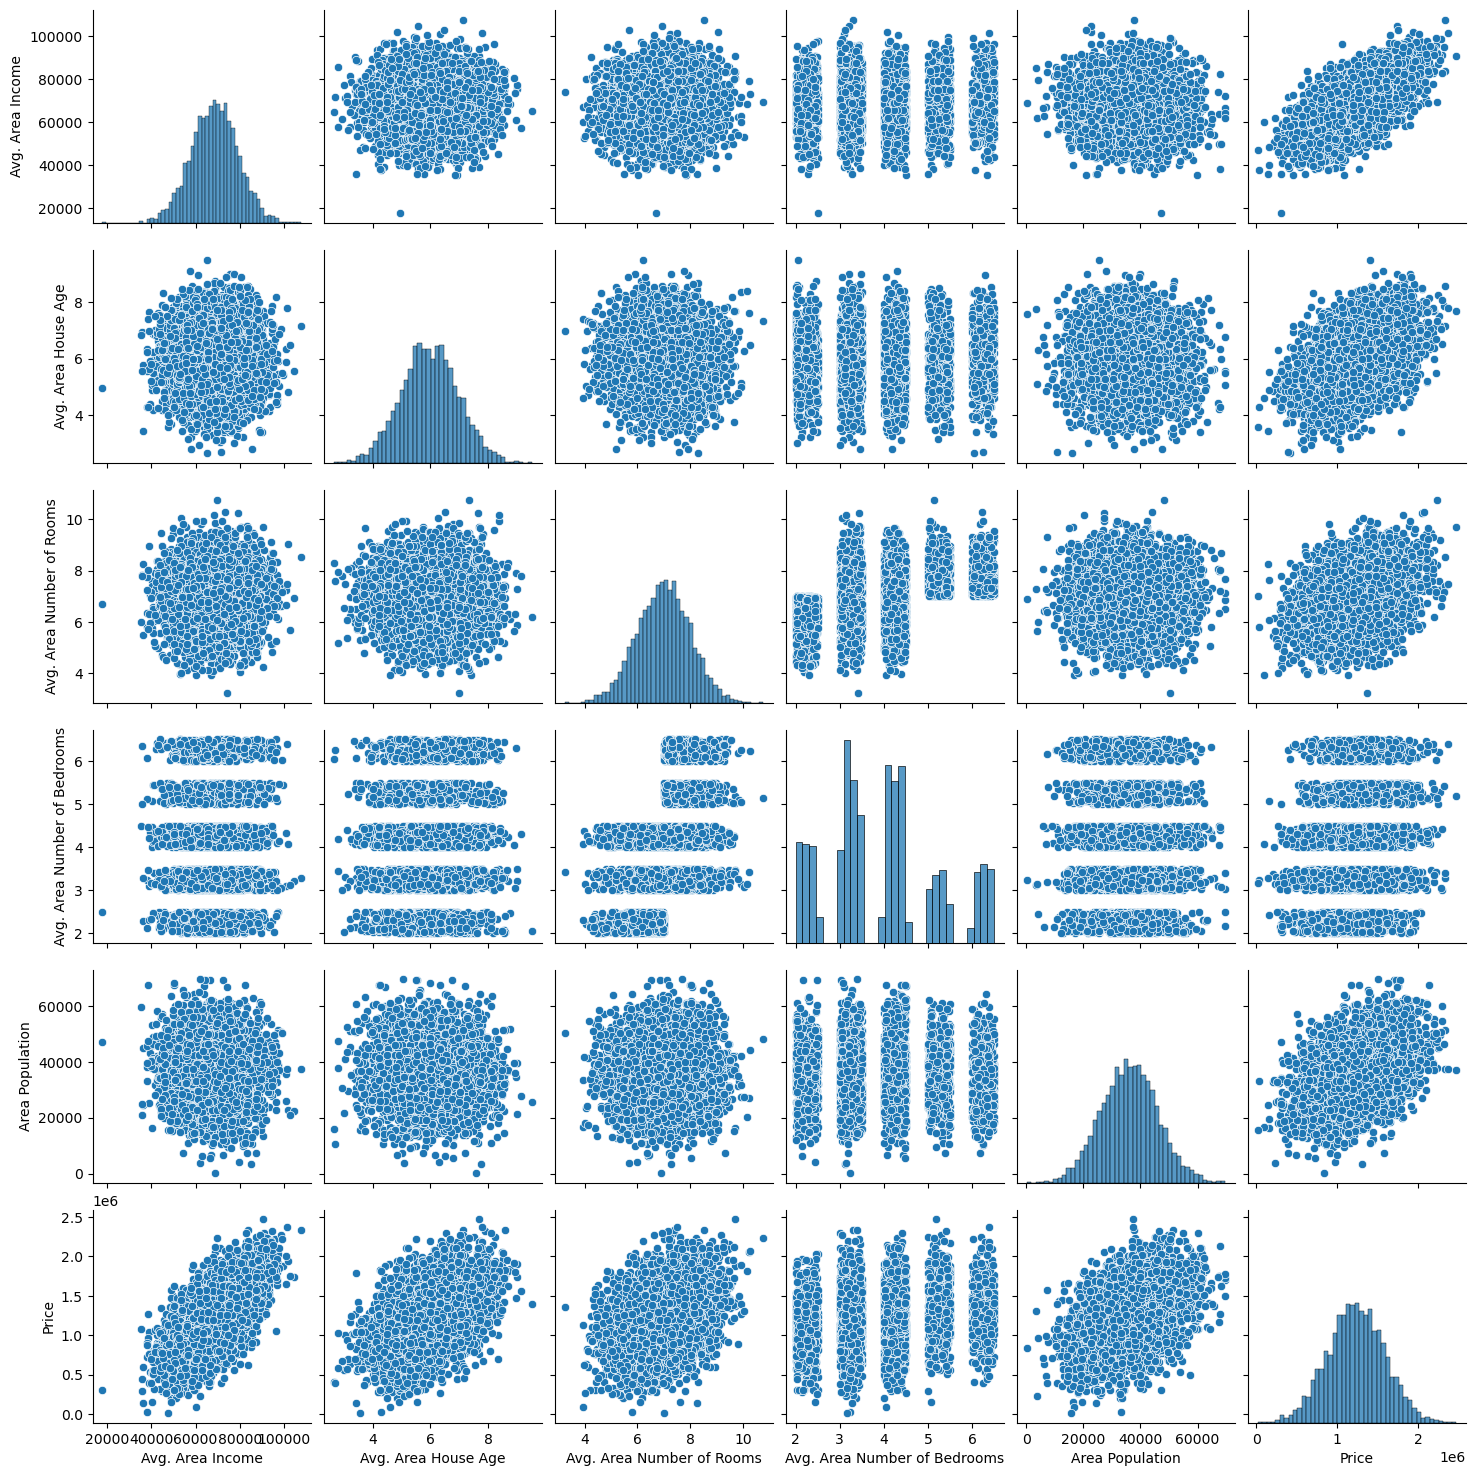

In [23]:
# Step 6: Visualizing the relationships between features using pairplot
print("\nGenerating pairplot...")
sns.pairplot(data)
plt.show()

Generating heatmap to see correlations...


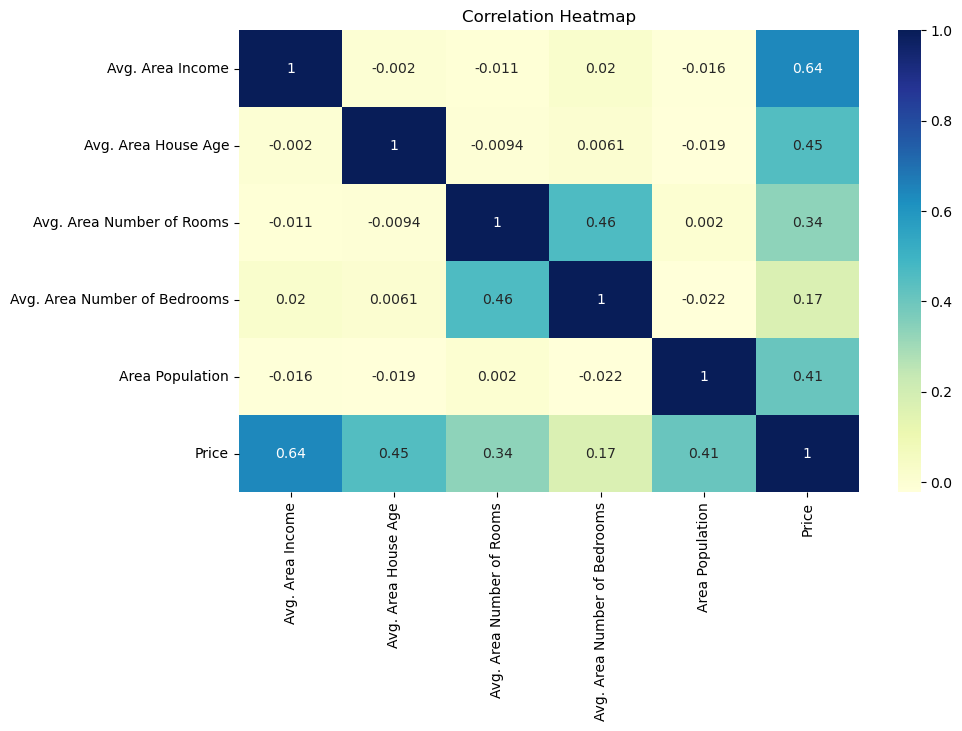

In [31]:
# Step7: Visualize the correlation matrix as a heatmap
print("Generating heatmap to see correlations...")

# Droping non-numeric columns (like 'Address') before correlation
numeric_data = data.drop(['Address'], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

Plotting Avg. Area Income vs Price...


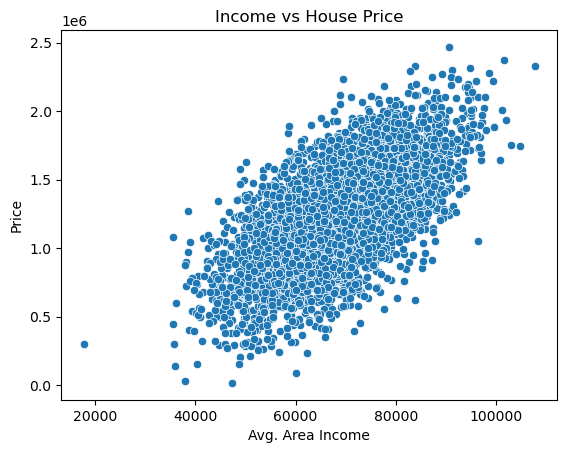

In [33]:
# Step 8: Checking the relationship between Average Area Income and Price
print("Plotting Avg. Area Income vs Price...")
sns.scatterplot(x=data['Avg. Area Income'], y=data['Price'])
plt.title("Income vs House Price")
plt.show()

In [35]:
# Step 9: Preparing the data for model training
# We will use all columns except 'Price' and 'Address' as input features
# 'Price' is the target we want to predict
input_features = data.drop(['Price', 'Address'], axis=1)
target_variable = data['Price']

In [37]:
# Step 10: Spliting the data into training and testing parts
# This helps us check how well the model performs on unseen data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.3, random_state=1)

In [45]:
# Step 11: Importing the model we want to use
from sklearn.linear_model import LinearRegression

In [47]:
# Step 12: Creating the model object
linear_model = LinearRegression()

In [49]:
# Step 13: Training the model using the training data
linear_model.fit(x_train, y_train)

LinearRegression()

In [53]:
# Step 14: Checking the learned coefficients and intercept
print("\nIntercept of the model (b0):")
print(linear_model.intercept_)
print("\nCoefficients for each feature:")
coefficients = pd.DataFrame()
coefficients['Feature'] = input_features.columns
coefficients['Coefficient'] = linear_model.coef_
print(coefficients)


Intercept of the model (b0):
-2645289.864343253

Coefficients for each feature:
                        Feature    Coefficient
0              Avg. Area Income      21.639855
1           Avg. Area House Age  165729.214008
2     Avg. Area Number of Rooms  120958.348945
3  Avg. Area Number of Bedrooms    1949.092538
4               Area Population      15.226224


In [55]:
# Step 15: Making predictions using the test data
y_predicted = linear_model.predict(x_test)

In [57]:
# Step 16: Comparing the predicted prices with actual prices
print("\nComparing actual and predicted prices:")
comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_predicted})
print(comparison.head())


Comparing actual and predicted prices:
      Actual Price  Predicted Price
2764  1.413580e+06     1.555152e+06
4767  1.618721e+06     1.583399e+06
3814  8.413925e+05     9.414814e+05
3499  8.814439e+05     9.424062e+05
2735  1.174748e+06     1.183395e+06


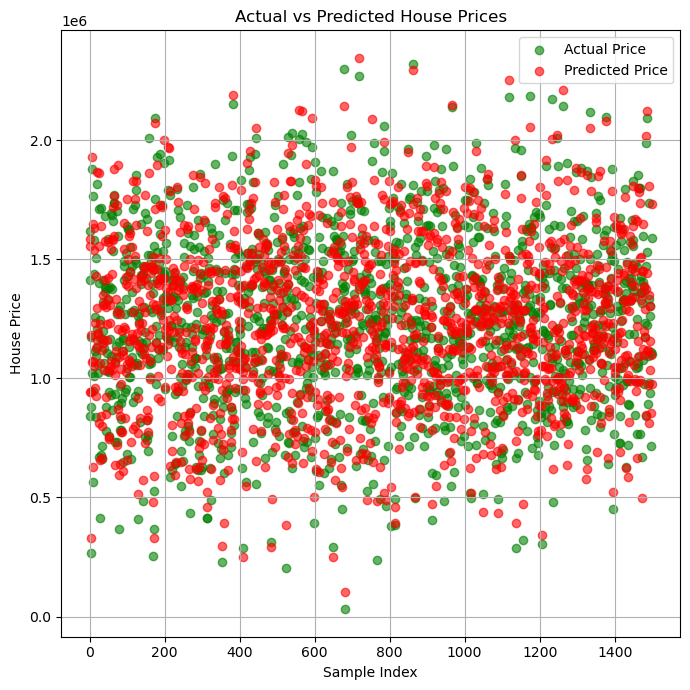

In [63]:
# Step 17: Plotting actual vs predicted prices (with different colors)

plt.figure(figsize=(7, 7))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Price', alpha=0.6)

# Plot predicted values
plt.scatter(range(len(y_predicted)), y_predicted, color='red', label='Predicted Price', alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Step 18: Evaluating the model performance using error metrics
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Model Evaluation:
Mean Absolute Error (MAE): 82745.90894156013
Mean Squared Error (MSE): 10567448570.930761
Root Mean Squared Error (RMSE): 102798.0961444849
